<a href="https://colab.research.google.com/github/Nusrat-Rumi/Spintronics/blob/main/Hysteresis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! echo "This machine runs" $(uname)

This machine runs Linux


In [2]:
# Download the mumax3 binary
!wget https://mumax.ugent.be/mumax3-binaries/mumax3.10_linux_cuda10.1.tar.gz
!tar -xvf mumax3.10_linux_cuda10.1.tar.gz
!rm mumax3.10_linux_cuda10.1.tar.gz
!rm -rf mumax3.10 && mv mumax3.10_linux_cuda10.1 mumax3.10

#update the PATH environment variable
import os
os.environ['PATH'] += ":/content/mumax3.10"



--2026-02-16 16:08:51--  https://mumax.ugent.be/mumax3-binaries/mumax3.10_linux_cuda10.1.tar.gz
Resolving mumax.ugent.be (mumax.ugent.be)... 157.193.40.77
Connecting to mumax.ugent.be (mumax.ugent.be)|157.193.40.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 150707207 (144M) [application/x-gzip]
Saving to: ‘mumax3.10_linux_cuda10.1.tar.gz’

mumax3.10_linux_cud 100%[===================>] 143.73M  21.5MB/s    in 7.5s    

2026-02-16 16:09:00 (19.2 MB/s) - ‘mumax3.10_linux_cuda10.1.tar.gz’ saved [150707207/150707207]

mumax3.10_linux_cuda10.1/
mumax3.10_linux_cuda10.1/mumax3-server
mumax3.10_linux_cuda10.1/lib/
mumax3.10_linux_cuda10.1/lib/libcurand.so.10
mumax3.10_linux_cuda10.1/lib/libcufft.so.10
mumax3.10_linux_cuda10.1/mumax3
mumax3.10_linux_cuda10.1/LICENSE
mumax3.10_linux_cuda10.1/mumax3-convert


In [3]:
!wget https://raw.githubusercontent.com/Nusrat-Rumi/Spintronics/refs/heads/main/hysteresis.mx3

--2026-02-16 16:09:02--  https://raw.githubusercontent.com/Nusrat-Rumi/Spintronics/refs/heads/main/hysteresis.mx3
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 697 [text/plain]
Saving to: ‘hysteresis.mx3’

hysteresis.mx3      100%[===================>]     697  --.-KB/s    in 0s      

2026-02-16 16:09:02 (50.6 MB/s) - ‘hysteresis.mx3’ saved [697/697]



In [4]:
!mumax3 hysteresis.mx3
#

//mumax 3.10 [linux_amd64 go1.14(gc) CUDA-10.1]
//GPU info: Tesla T4(14912MB), CUDA Driver 13.0, cc=7.5, using cc=75 PTX
//(c) Arne Vansteenkiste, Dynamat LAB, Ghent University, Belgium
//This is free software without any warranty. See license.txt
//********************************************************************//
//  If you use mumax in any work or publication,                      //
//  we kindly ask you to cite the references in references.bib        //
//********************************************************************//
//output directory: hysteresis.out/
//starting GUI at http://127.0.0.1:35367
SetGridsize(128, 32, 1)
SetCellsize(4e-9, 4e-9, 30e-9)
Msat = 800e3
Aex = 13e-12
m = randomMag()
relax()
//Did not use cached kernel: open /tmp/mumax3kernel_[128 32 1]_[0 0 0]_[4e-09 4e-09 3e-08]_6_0 0.ovf: no such file or directory
// Calculating demag kernel 1 %
// Calculating demag kernel 100 %
//Cached kernel: /tmp/mumax3kernel_[128 32 1]_[0 0 0]_[4e-09 4e-09 3e-08]_6_
Bmax :=

In [5]:
!mumax3-convert -png hysteresis.out/*.ovf

hysteresis.out/*.ovf
0 files converted,  0 skipped,  0 failed


In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Set all the plots in this notebook equal to a value of 500 DPI by setting rcParams.
plt.rcParams['figure.dpi'] = 500

# Set the hexidecimal color code for for the plot lines in a nice dark green shade.
plt.rcParams['lines.color'] = '#025945' # For a pure blue shade, use #0000FF.

In [14]:
from google.colab import files

# This will open a file chooser window
uploaded = files.upload() #ekhane eshe choose file e giye xcel file upload dibo


Saving hysteresis.xlsx to hysteresis.xlsx


In [15]:
file_path = '/content/hysteresis.xlsx'


In [18]:
# Load the data from the Excel file
data = pd.read_excel(file_path)

# Display the first few rows of the dataframe. Unnamed columns were deleted manually in Excel. NaN means no data.
print(data.head())

   # t (s)         mx ()         my ()     mz ()  B_extx (T)  B_exty (T)  \
0        0  5.215406e-08 -3.912544e-06 -0.017184       0.000           0   
1        0  2.470306e-02 -2.152286e-06 -0.017186       0.001           0   
2        0  4.942730e-02 -1.148757e-06 -0.017194       0.002           0   
3        0  7.403994e-02 -5.978800e-07 -0.017206       0.003           0   
4        0  9.856487e-02 -2.887682e-07 -0.017224       0.004           0   

   B_extz (T)  
0           0  
1           0  
2           0  
3           0  
4           0  


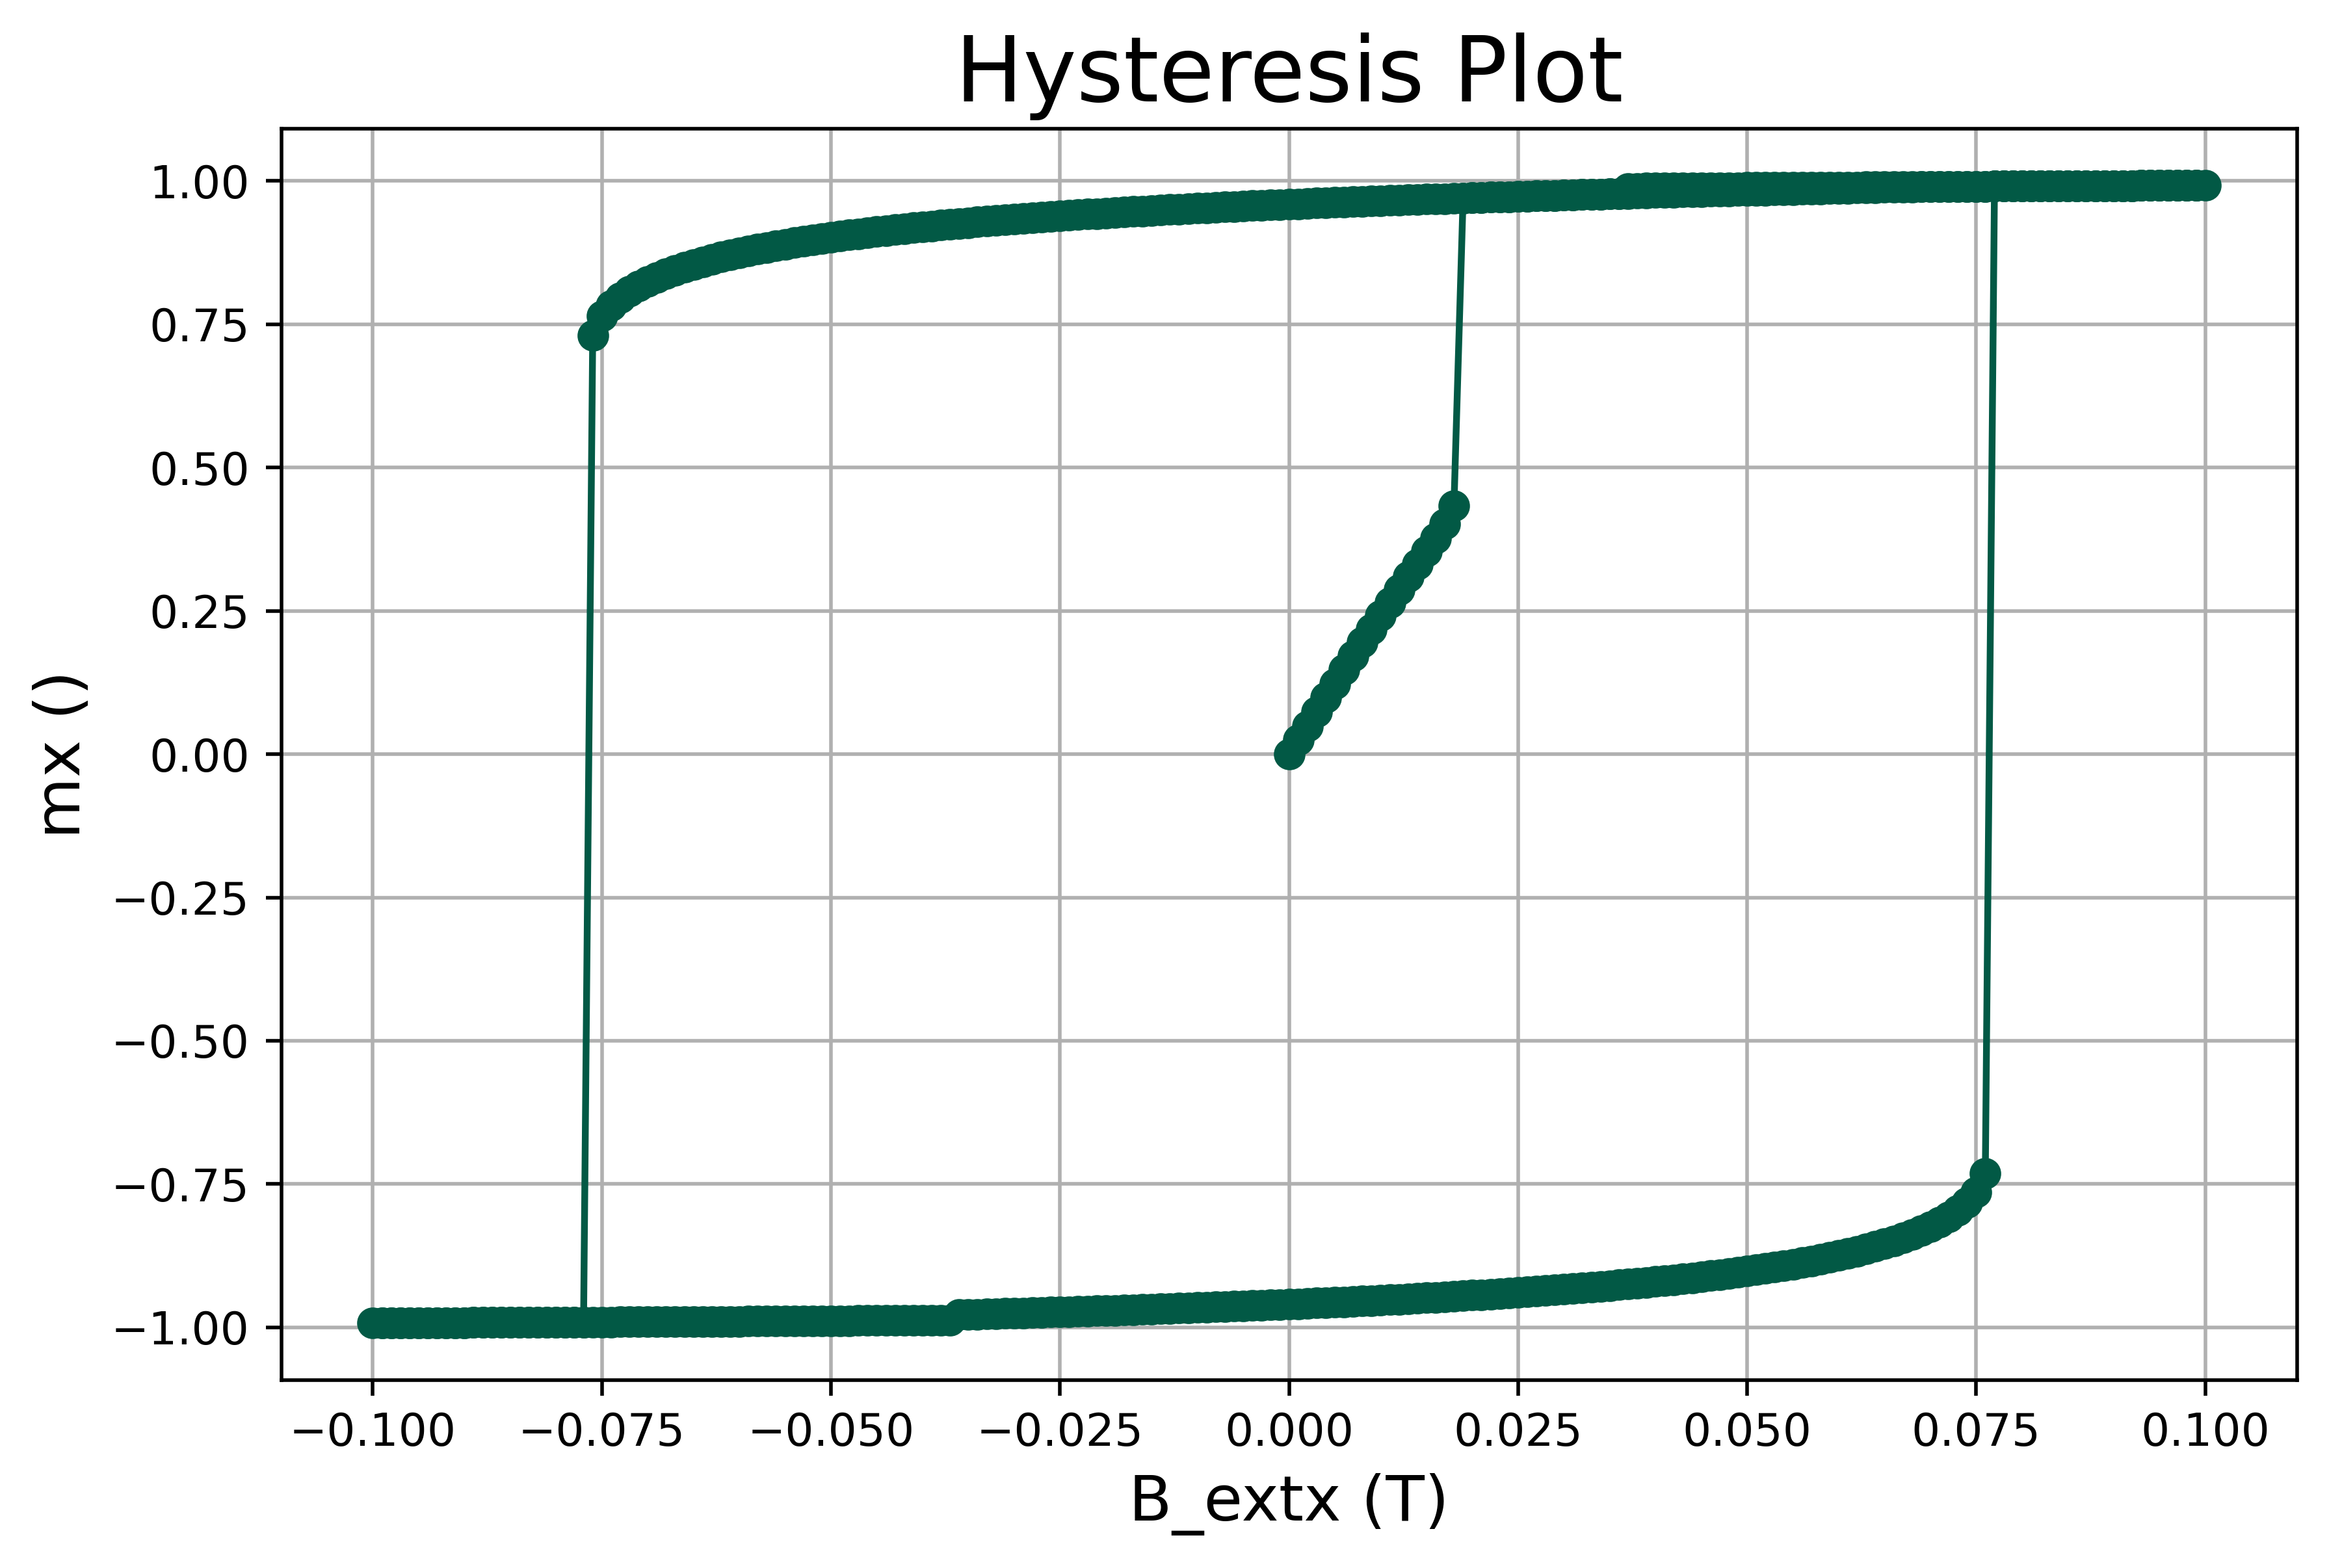

In [24]:
# Create a hysteresis plot with 'B_extx (T)' on the x-axis and 'mx ()' on the y-axis
# Be sure to copy TXT table result from MuMax3 in the folder into an XLSX document, followed by erasing unncessary columns if needed.
# After saving XLSX file into folder location, upload the file here or in the same folder where this notebook is stored.
plt.figure(figsize=(8, 5))
plt.plot(data['B_extx (T)'], data['mx ()'], marker='o', linestyle='-', color='#025945')
plt.title('Hysteresis Plot', fontsize=20)
plt.xlabel('B_extx (T)', fontsize=14)
plt.ylabel('mx ()', fontsize=14)
plt.grid(True)
plt.show()

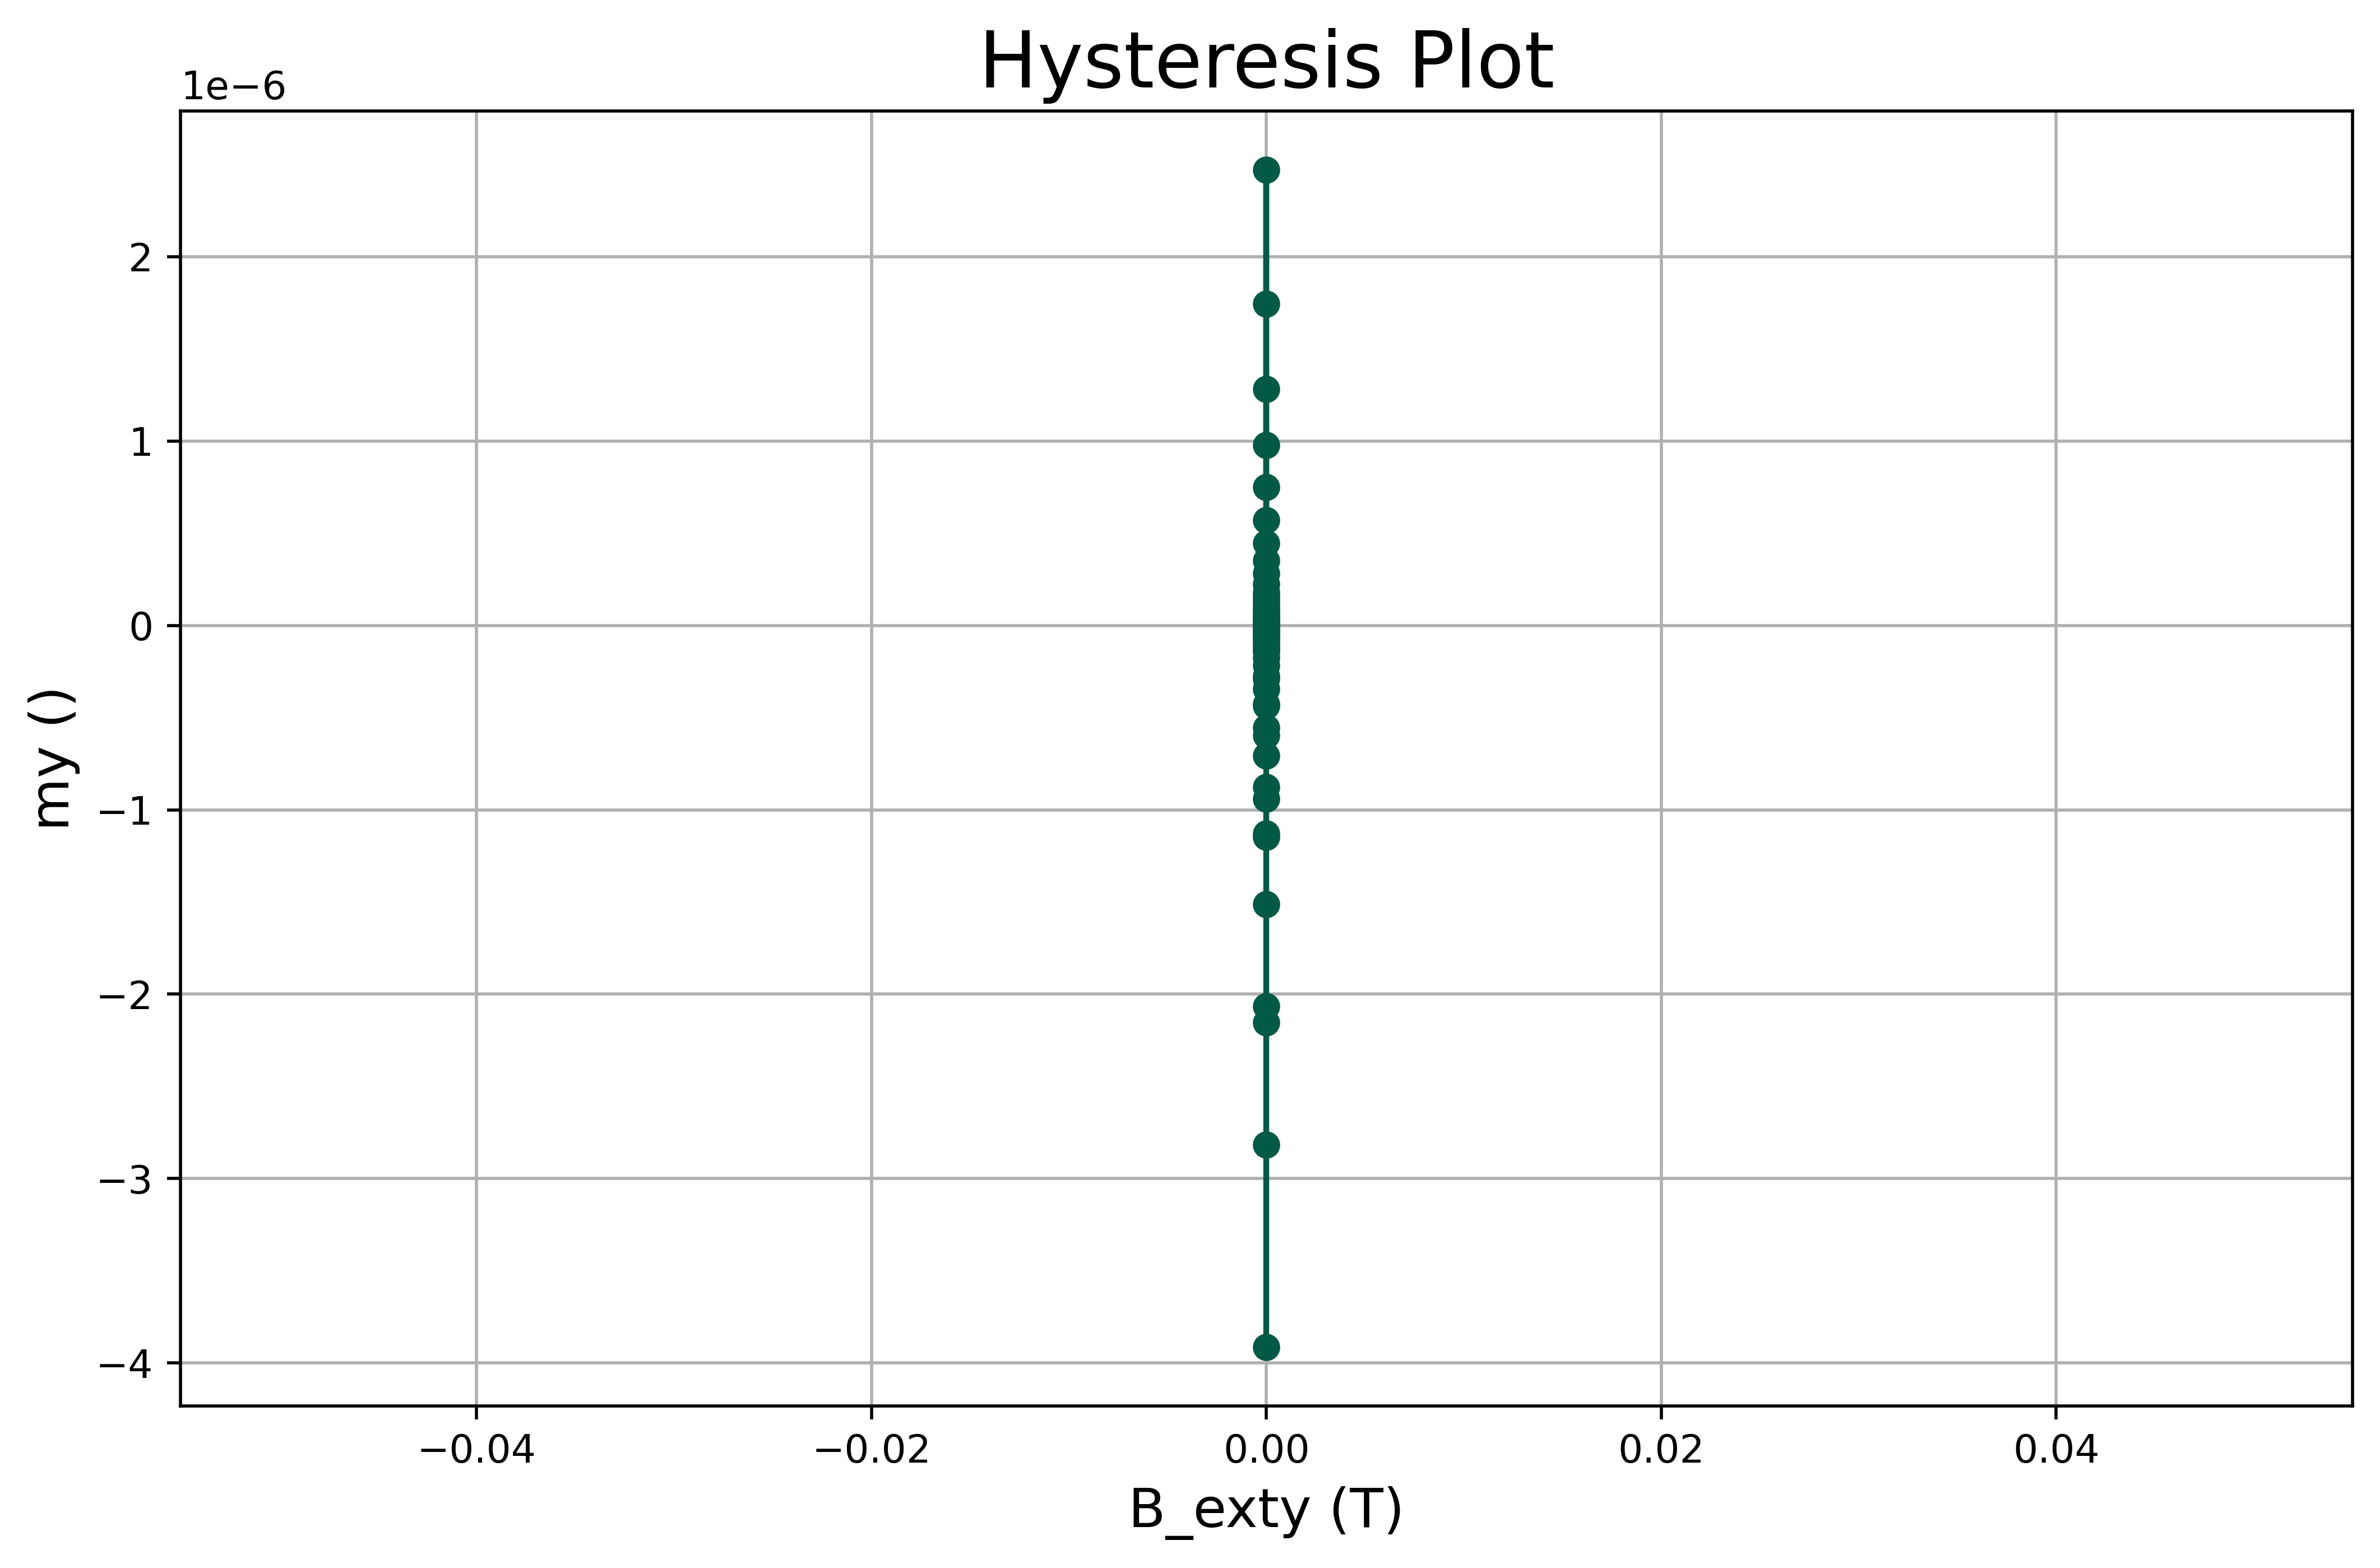

In [20]:
# Create a hysteresis plot with 'B_exty (T)' on the x-axis and 'my ()' on the y-axis
# Be sure to copy TXT table result from MuMax3 in the folder into an XLSX document, followed by erasing unncessary columns if needed.
# After saving XLSX file into folder location, upload the file here or in the same folder where this notebook is stored.
plt.figure(figsize=(10, 6))
plt.plot(data['B_exty (T)'], data['my ()'], marker='o', linestyle='-', color='#025945')
plt.title('Hysteresis Plot', fontsize=20)
plt.xlabel('B_exty (T)', fontsize=14)
plt.ylabel('my ()', fontsize=14)
plt.grid(True)
plt.show()

easy axis er jonno B_ext = vector(B, 0, 0) hoy. eta easy axis er. hard axis e (0,B,0) hbe


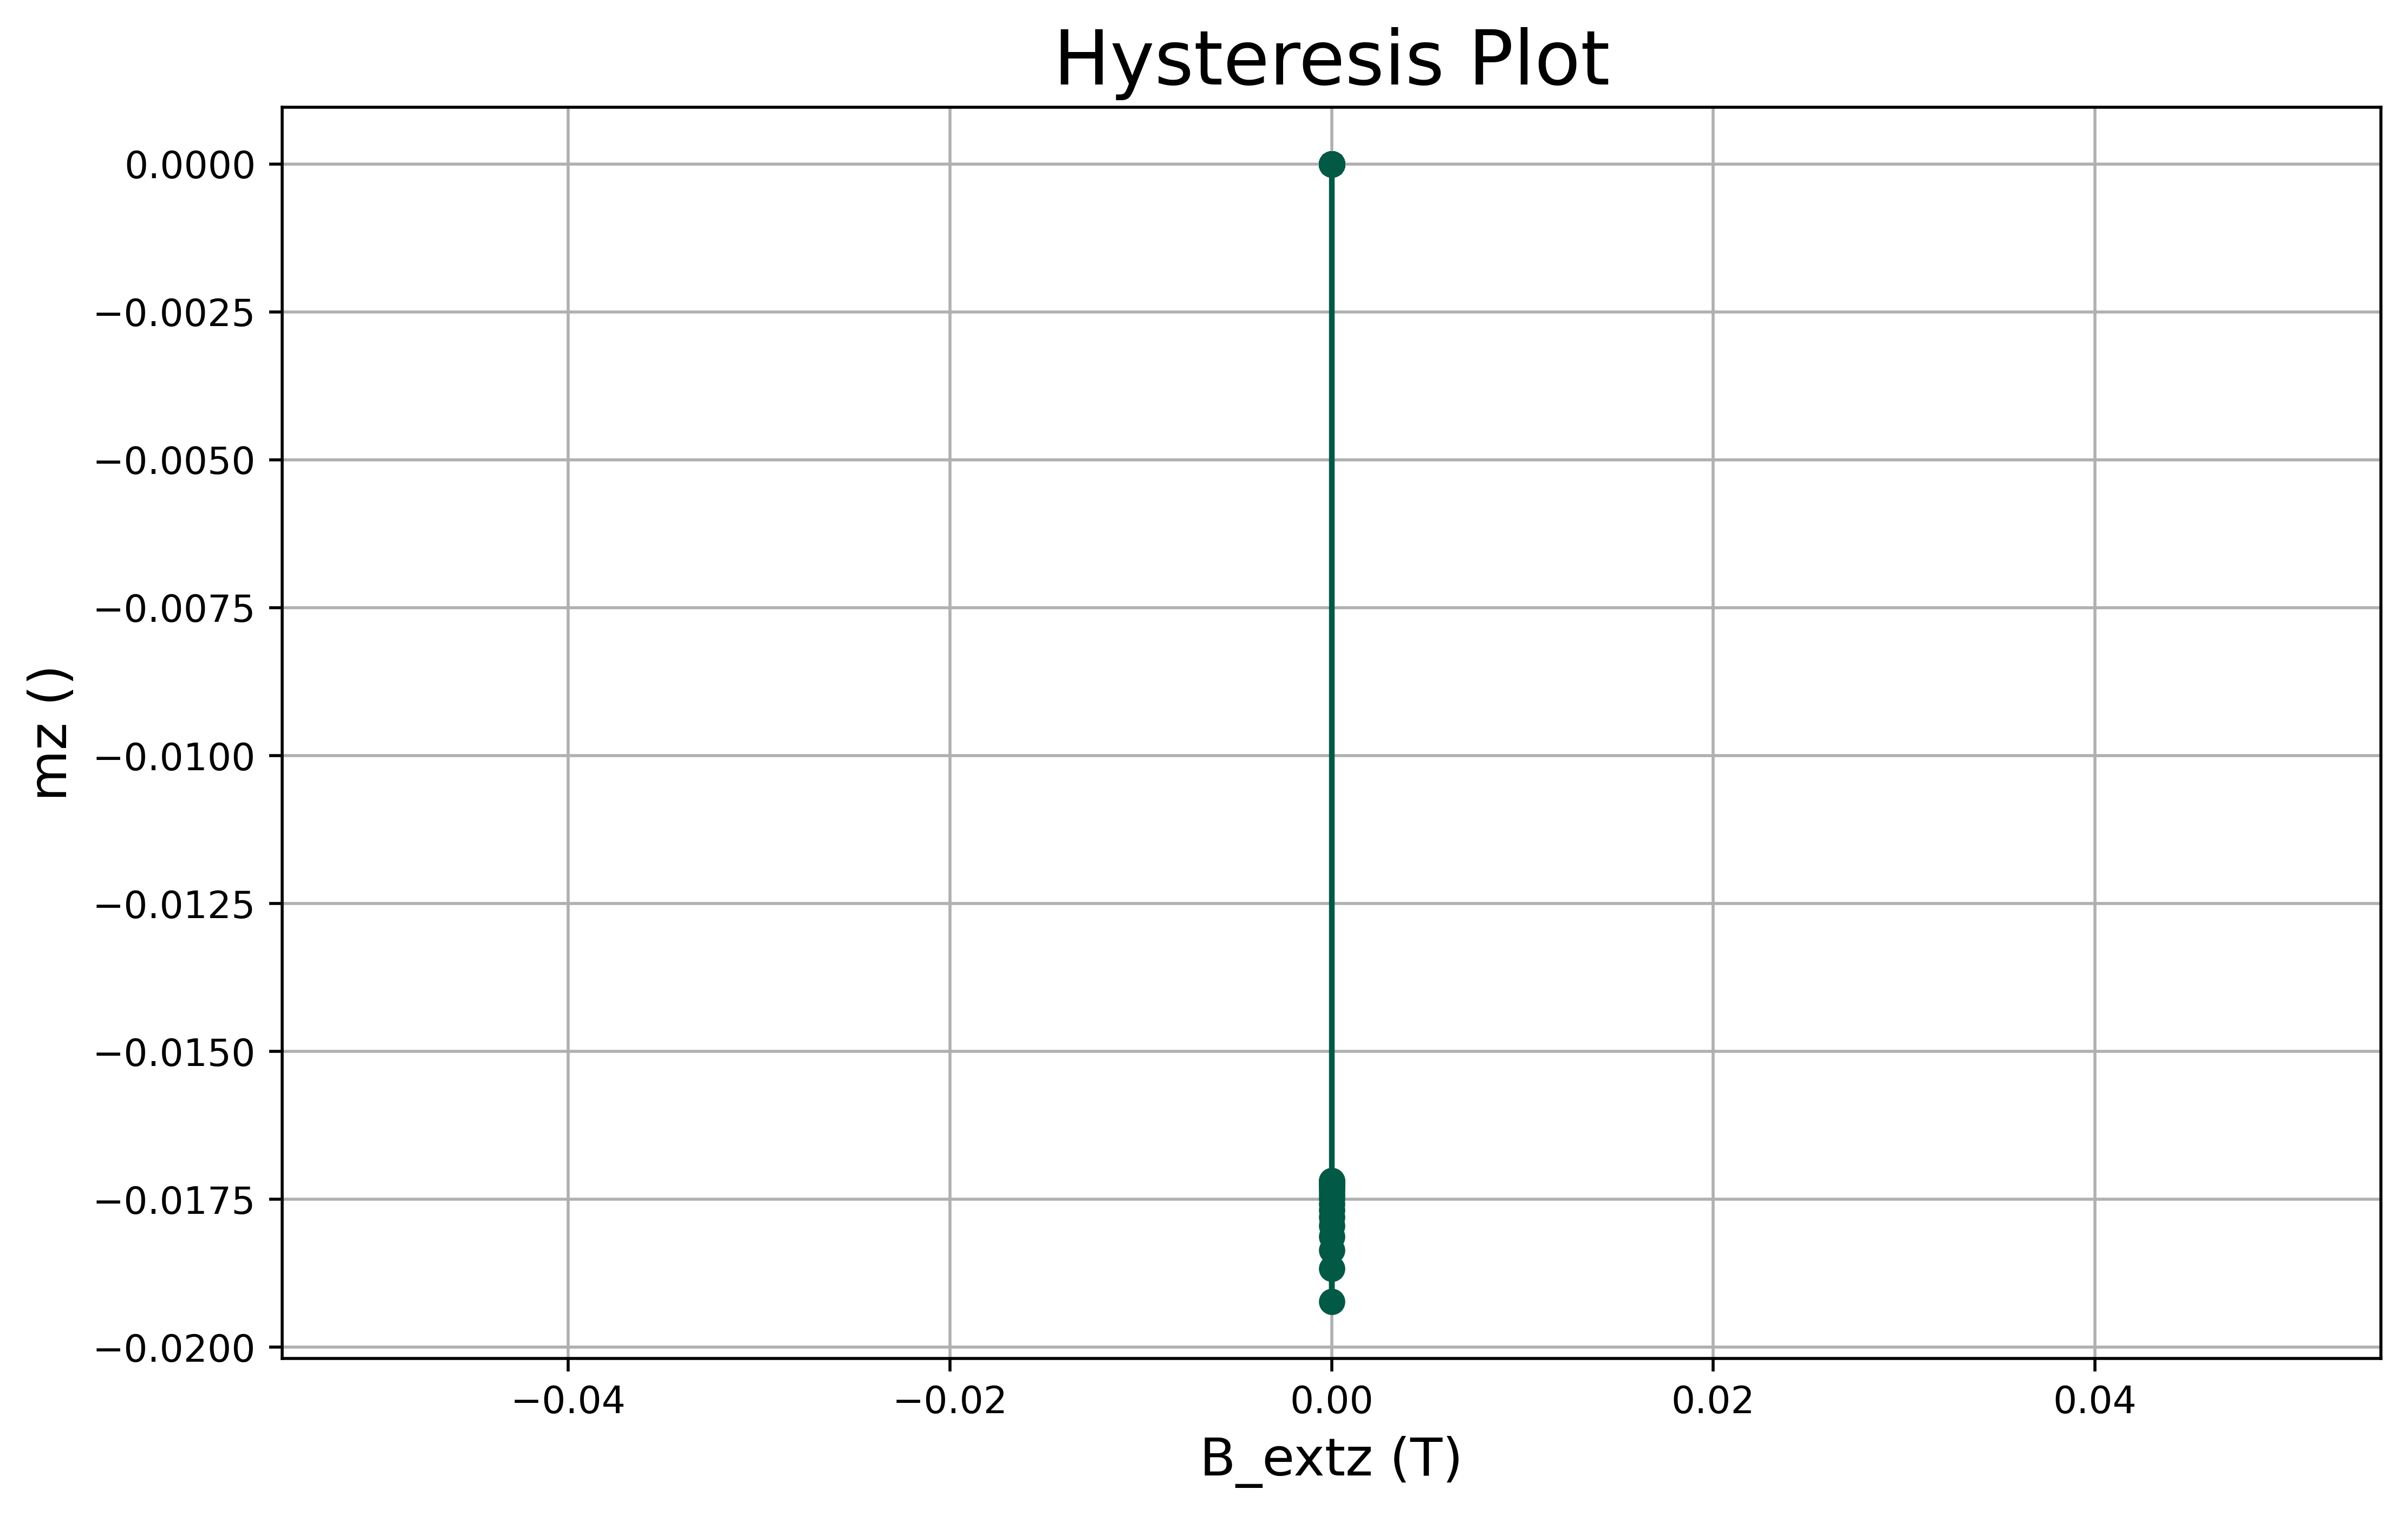

In [21]:
# Create a hysteresis plot with 'B_exty (T)' on the x-axis and 'my ()' on the y-axis
# Be sure to copy TXT table result from MuMax3 in the folder into an XLSX document, followed by erasing unncessary columns if needed.
# After saving XLSX file into folder location, upload the file here or in the same folder where this notebook is stored.
plt.figure(figsize=(10, 6))
plt.plot(data['B_extz (T)'], data['mz ()'], marker='o', linestyle='-', color='#025945')
plt.title('Hysteresis Plot', fontsize=20)
plt.xlabel('B_extz (T)', fontsize=14)
plt.ylabel('mz ()', fontsize=14)
plt.grid(True)
plt.show()